# GRIP@TSF TASK 01 for Data Science and Business Analytics Internship

## Prediction using Supervised ML

#### The goal of this task is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
#### This is a simple linear regression task as it involves just two variables.

### Import required libraries to perform the task

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Import dataset from the url

In [2]:
#Import the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data1=data
print("data imported successfully")
data.head()

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Describing the imported dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualize the imported data

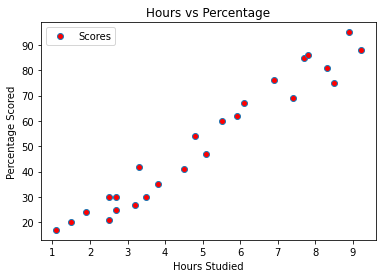

In [5]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o',markerfacecolor = "red")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

<AxesSubplot:xlabel='Hours'>

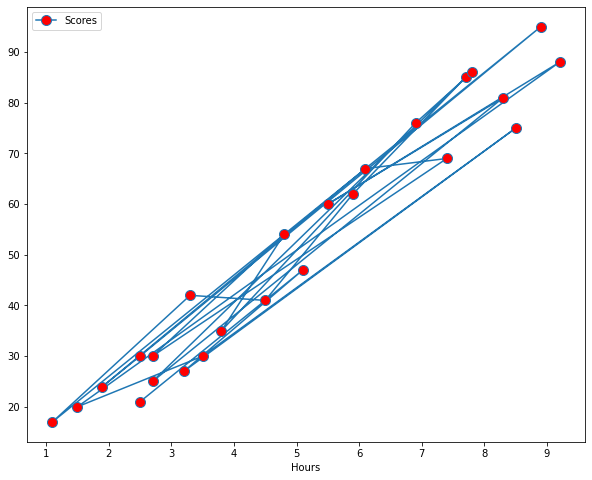

In [6]:
data.plot("Hours","Scores",linestyle = "-",marker = "o",markersize = "10",markerfacecolor = "red", figsize=(10,8))

##### We can clearly observe the positive linear relation between hours studied and percentage scored from the above two graphs

### Prepare the data

In [7]:
#x is input and y is output
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

### Train the data
##### Splitting the data into training data-set and test data-set and start training and saving with the best accuracy

In [8]:
best = 0
linear = linear_model.LinearRegression()

for _ in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

    linear.fit(x_train, y_train) # fit this data  to get best fit line
    acc = linear.score(x_test, y_test) # this will return the accuracy value of our model

    if acc > best:
        best = acc
print(" Best Accuracy: ",best)

 Best Accuracy:  0.9744726924175462


### Plotting the regression line

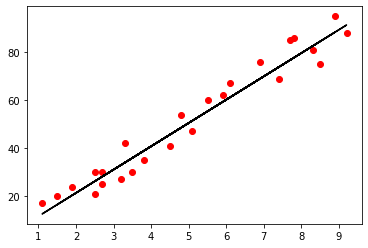

In [9]:
# Plotting the regression line
line = linear.coef_*x+linear.intercept_
# Plotting for the test data
plt.scatter(x, y, color = 'Red')
plt.plot(x, line, color = 'Black');
plt.show()

#### Comparing test data score with training data score

In [10]:
print('Test Score')
print(linear.score(x_test, y_test))
print('Training Score')
print(linear.score(x_train, y_train))

Test Score
0.9718672534053461
Training Score
0.9456664763441508


### Make predictions on test data

In [11]:
y_predict= linear.predict(x_test)

In [12]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
data

,Actual,Predicted
0,30,26.211869
1,62,59.262710
2,60,55.374376
3,20,16.491033
4,95,88.425218


###### Ploting the line graph to observe the variation between the actual and predicted value


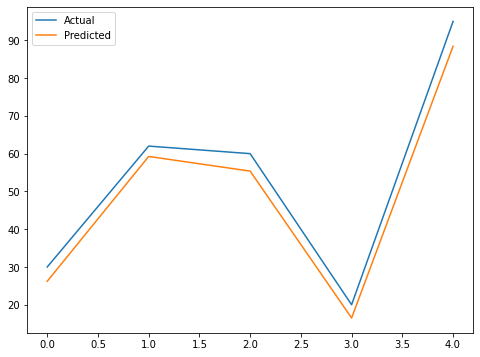

In [13]:
data.plot(kind='line', figsize=(8,6))
plt.show()

#### Predicting the score of custom data

In [14]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a day is: ', linear.predict([[9.25]])[0])

Score of student who studied for 9.25 hours a day is:  91.8275103629135


### Evaluating the model
##### This evaluates the performance and effieciency of the model when compared to other metrics

In [15]:
#Checking the efficiency of model
mean_sq_error = mean_squared_error(y_test, y_predict)
mean_abs_error = mean_absolute_error(y_test, y_predict)
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_predict))
print("Mean Squred Error:",mean_sq_error)
print("Mean absolute Error:",mean_abs_error)
print("Root Mean Squared Error:",root_mean_sq_error)

Mean Squred Error: 19.755939968629765
Mean absolute Error: 4.246958802131793
Root Mean Squared Error: 4.444765457100044


### Thank you for watching

# © Shahil Mohammed, 2021